<img src='https://data.jedha.co/user/said.soufyan@gmail.com/files/Explore%20data/src/speeddate.jpg?_xsrf=2%7Cd846423c%7Cce541685418140b04a1a9ddbda36724f%7C1655373857' width="100" height="100">

# Projet: SpeedDating 20 Fev 2022
**<p>Author: Said SOUFYAN</p>**

<img src='https://data.jedha.co/user/said.soufyan@gmail.com/files/Explore%20data/src/Engrenage-3.png?_xsrf=2%7C9f137676%7C28e8cf2e6fb24441f8766ce520e570ba%7C1646912795' width="100" height="100">

<h1>Install necessary Packages</h1>

In [2]:
!pip install plotly

In [3]:
#import necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
from plotly.subplots import make_subplots

import plotly.express as px
import plotly.graph_objects as go

#additionnal parameters about graphics 
sns.set(rc={'figure.figsize':(11.7,8.27)})
pio.renderers.default ="iframe_connected"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h1>Exploring Data</h1>

In [4]:
ds = pd.read_csv("src/Speed Dating Data.csv", encoding = 'ISO-8859-1')
ds.shape

(8378, 195)

In [5]:
ds.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

In [6]:
ds.shape

(8378, 195)

In [7]:
ds.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

<h1>Data cleaning & Formating

In [8]:
ds.head(10)
print(ds.shape)
#declare a clean funtion which will be used to format the income amount which is by default foramted in "english format" to a standard format ex :1,000.23 => 1000
def clean(txt):
    txt = txt.replace(",","")
    numb = int(txt[1:].split(".")[0])
    return numb


#Starting DataPrep and cleanig process 
ds["gender"] = ds["gender"].replace(1,'Men')
ds["gender"] = ds["gender"].replace(0,'Women')
ds["match"] = ds["match"].replace(1,'Yes')
ds["match"] = ds["match"].replace(0,'Non')
ds["income"] = ds["income"].fillna("$0.00")
ds["income"] = ds["income"].apply(clean)
#adding an intervall attribute
ds["income_int"]=ds["income"].apply(lambda x: ("0$ or not declared" if x == 0 else( "0-2k$" if x < 2000 else ( "2k$-4k$" if x <4000 else ( "4k$-6k$" if x < 6000 else ( "6k$-8k$" if x < 8000 else ">8k$") )))))

ds['race'] =ds['race'].replace(1,"Black/African American")
ds['race'] =ds['race'].replace(2,"European/Caucasian-American")
ds['race'] =ds['race'].replace(3,"Latino/Hispanic American")
ds['race'] =ds['race'].replace(4,"Asian/Pacific Islander/Asian-American")
ds['race'] =ds['race'].replace(5,"Native American")
ds['race'] =ds['race'].replace(6,"Other")

ds['samerace'] =ds['samerace'].replace(1,"Yes")
ds['samerace'] =ds['samerace'].replace(0,"Non")




(8378, 195)


<img src='https://data.jedha.co/user/said.soufyan@gmail.com/files/Explore%20data/src/3721591.png?_xsrf=2%7C9f137676%7C28e8cf2e6fb24441f8766ce520e570ba%7C1646912795' width="100" height="100">

<h1>EDA

<h2>Using Seaborn


<h4>Participants Age distribution 

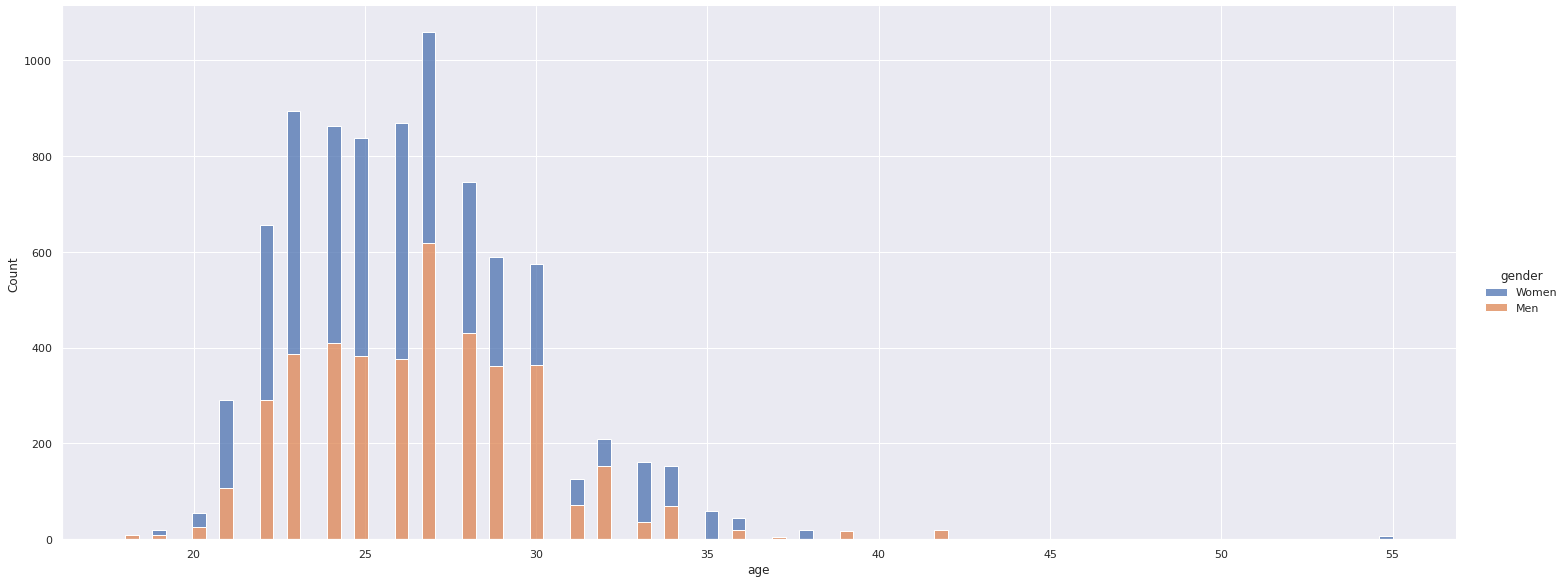

In [9]:
sns.displot(data=ds,x="age",hue="gender",multiple="stack",height=8.27,aspect=20.7/8.27)


<i>Major population in our dataset is young

<h4>Participants Income distribution 

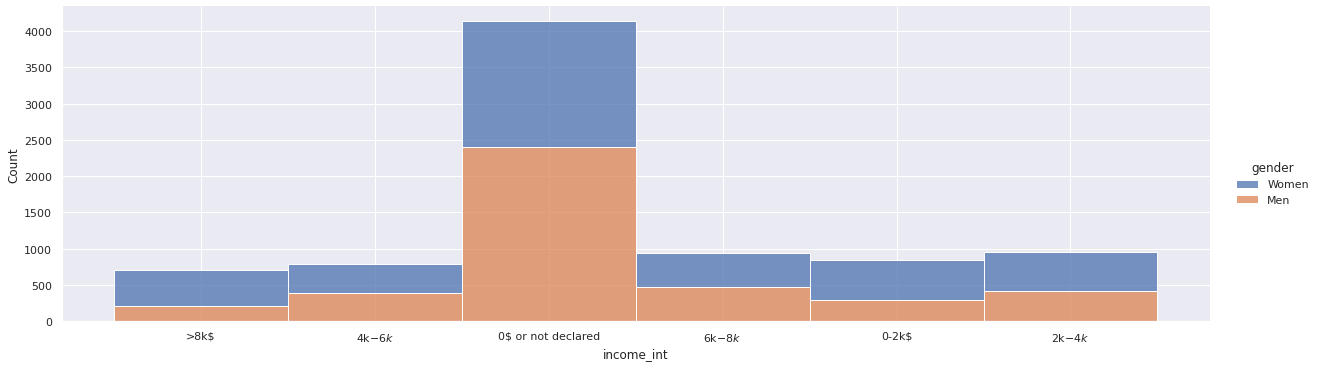

In [10]:
sns.displot(data=ds,x="income_int",hue="gender",row_order=ds["income_int"],multiple="stack",height=5.27,aspect=10.7/3.27)

<i>No conclusion as major population didn't deckare an income

<h3>Participation versus matchings in each wave

In [11]:
dsMatch=ds.groupby(['match']).size()
print("%matching accross all waves ",100*round(dsMatch.head()[1]/dsMatch.head()[0],2),"%")

%matching accross all waves  20.0 %


<i>we see above that <b>only 20% participants</b> get a <b>matching</b> (the both partneres marked Yes after dating)

Text(0.5, 0.98, 'Partipation verus matching')

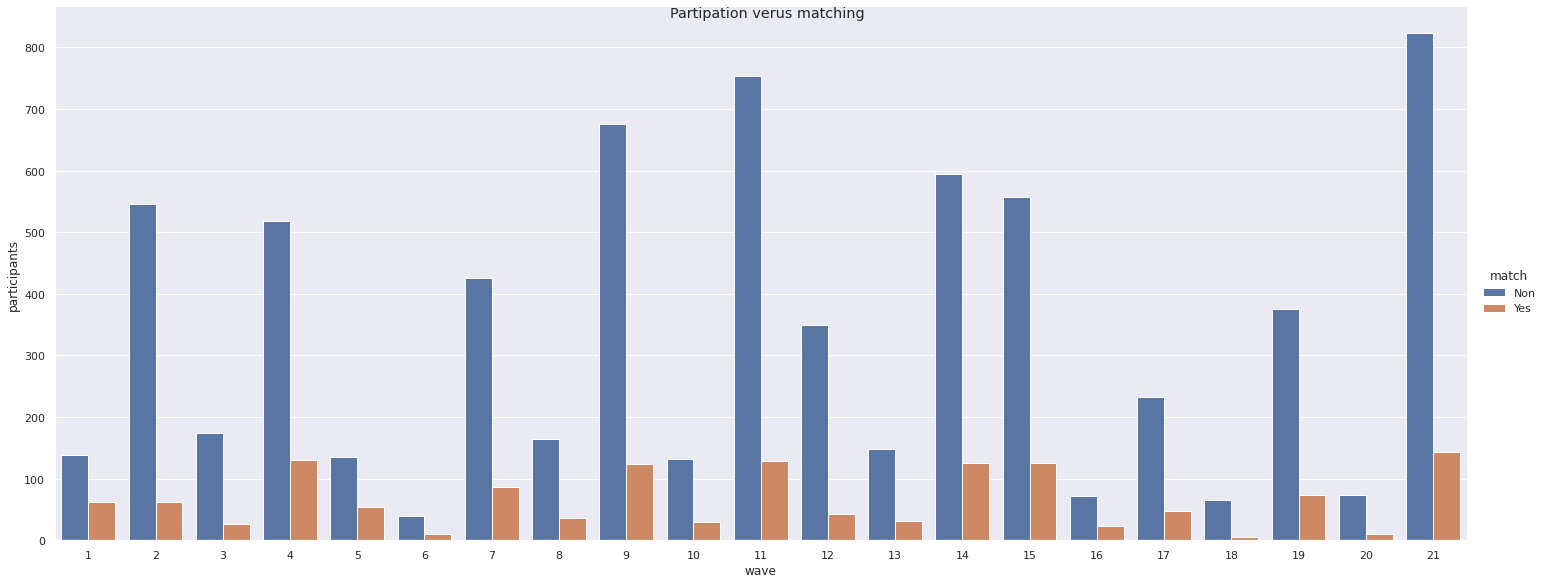

In [45]:
dsMatch=ds.groupby(['wave','match']).size().reset_index(name='participants')
rp=sns.catplot(x="wave", y="participants", hue="match", kind="bar", data=dsMatch,  height=8.27, aspect=20.7/8.27)
rp.fig.suptitle('Partipation verus matching')


<i> We see in this graphic the proportion of matching during each wave the <b>first one</b> look being <b>succefull</b> but nexts ones look not 

<h4>Correlation between race and matching?

,samerace,match,%Match
0,Non,Non,0.507103
1,Non,Yes,0.097171
2,Yes,Non,0.328280
3,Yes,Yes,0.067566


Text(0.5, 0.98, 'matching versus race')

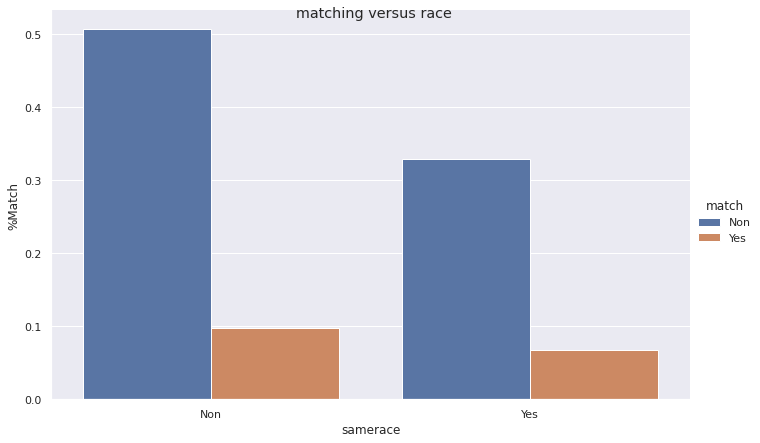

In [50]:
dsMatchRace=ds.groupby(['samerace','match']).size().reset_index(name='%Match')
dsMatchRace['%Match']= dsMatchRace['%Match'] /ds.id.count()
display(dsMatchRace)
rp=sns.catplot(x="samerace", y="%Match", kind="bar", hue="match" ,data=dsMatchRace,height=6.27, aspect=6.7/4.27)
rp.fig.suptitle('matching versus race')

<i>This graph do not give a clear correlation

<h2>EDA using : plotly express, plotly Graph Objects and matplotlib

<h4> Paticipation rate by gender

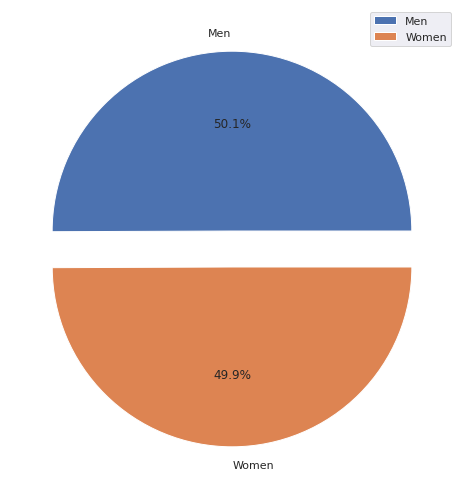

In [14]:
dsGender=ds.groupby(['gender']).size().reset_index(name='COUNTS')
#display(dsGender)
explode =(0,0.2)
plt.pie(dsGender['COUNTS'], labels=dsGender['gender'], autopct='%1.1f%%', explode =explode)
plt.legend()
plt.show()

<i>We see in this graphic above an equity in gender of participant in these waves 

<h4>Correlation between race and matching?

In [15]:
dsMatchRace=ds.groupby(['race','match']).size().reset_index(name='cntmatch')
dsMatchRaceY=dsMatchRace[dsMatchRace["match"]=='Yes']
dsMatchRaceN=dsMatchRace[dsMatchRace["match"]=='Non']
#display(dsMatchRace)
#explode =(0,0.2)
fig = go.Figure()

long_df = px.data.medals_long()

fig.add_trace(
    go.Bar(
                x =dsMatchRaceY['race'] ,
                y = dsMatchRaceY['cntmatch'],name="Matching"
               
        
              
                )
)

fig.add_trace(
    go.Bar(
                x =dsMatchRaceN['race'] ,
                y = dsMatchRaceN['cntmatch'],name="Non Matching"
                
              
                )
)
#plt.bar(ind,dsMatchRace['race'],y=dsMatchRace['cntmatch'],color='match',width=0.25)
fig.update_layout(
    title_text="Couple Matching based on race")
fig.show()



In [16]:
dsRace=ds.groupby(['race','match']).size().reset_index(name='Nbmatch')

dsRacePiv= pd.pivot_table(dsRace, values = 'Nbmatch', index=['race'], columns = 'match').reset_index()

dsRacePiv["%YesNon"]=round(dsRacePiv["Yes"] / (dsRacePiv["Non"]+dsRacePiv["Yes"]),2)
#dsRacePiv['%match']= dsRace['%match'] /ds.id.count()
dsRacePiv.head(10)
fig = px.line(dsRacePiv.sort_values(by = '%YesNon'), x="race", y="%YesNon")
fig.show()


<i>the rate of matching(Yes/"Yes+Non") is a little bit high in Black American population

<h4>Participants origine

In [81]:
ds.head(10)
dsRacePopPie=ds.groupby(['race']).size().reset_index(name='NbRace')
dsRacePopPie.head(10)
fig = px.pie(ds,values='id', names='race',title='Participants origine' ,color_discrete_sequence=['#4c73b1','#35507b','#854f31','#de8452','#c77649','#b16941','#9b5c39','#b7c7e0','#e2e8f2', '#c77649'])
fig.show()

In [70]:
print(px.colors.sequential)

<module '_plotly_utils.colors.sequential' from '/opt/conda/lib/python3.9/site-packages/_plotly_utils/colors/sequential.py'>


<h2>EDA Using plotly

<h4>Exploring waves which look succefull 

In [18]:
dsGender=ds.groupby(['wave','gender','match']).size().reset_index(name='CntByGender')

dsGender= pd.pivot_table(dsGender, values = 'CntByGender', index=['wave'], columns = 'match').reset_index()
dsGender['%match']=100* dsGender['Yes'] /(dsGender['Non'] +dsGender['Yes'] )

dsPart=ds.groupby(['wave']).size().reset_index(name='CntPart')

In [19]:
dsPart.head()

,wave,CntPart
0,1,200
1,2,608
2,3,200
3,4,648
4,5,190


In [20]:
fig = make_subplots(rows=1, cols=2)
dsGender= dsGender[['wave','%match']]
fig.add_bar(x=dsGender["wave"], 
                y=dsGender["%match"],                 
                name="%Matching by waves", 
                row=1, 
                col=1)

fig.add_scatter(x= dsPart["wave"] ,y=dsPart['CntPart'],
                name="Participation in waves", 
                row=1, 
                col=2)
 
fig.show()

<i>The <b>first and 5th</b> wave were clearly succefull, we cannot conclud anything about the 16th as the particiption rate in these wave were low (<90)

<h4>Exploring selectivity by gender

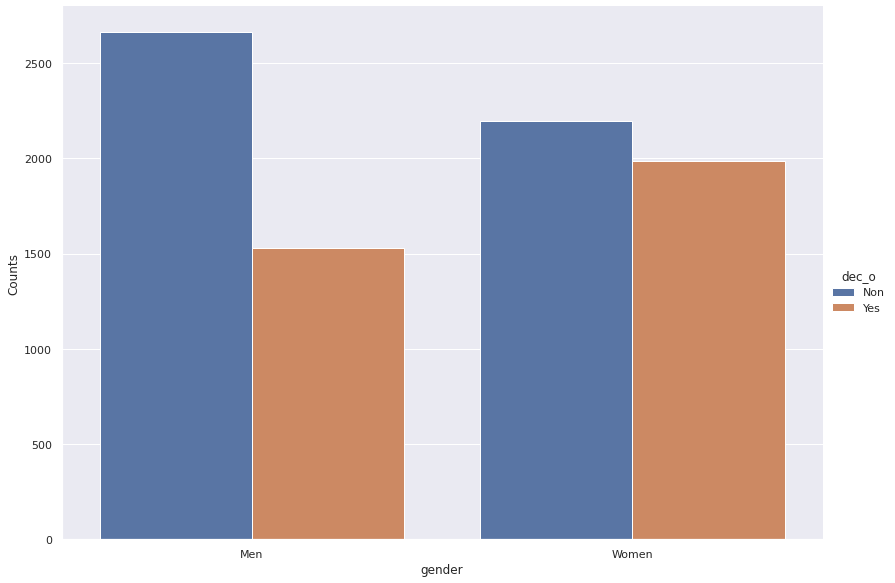

In [21]:
dsDec=ds.groupby(['gender','dec_o']).size().reset_index(name='Counts')
dsDec["dec_o"] =dsDec["dec_o"].replace(1,'Yes')
dsDec["dec_o"] =dsDec["dec_o"].replace(0,'Non')
sns.catplot(x="gender", y="Counts", hue="dec_o", kind="bar", data=dsDec,  height=8.27, aspect=11.7/8.27)


<i><b>Men are  more selective</b> compared to <b>women</b>, the rate of "Yes" decision revelas this (0.36% for Men compared to 0.47% for women), maybe women pay attention to other quality than attrativity or physical look and are curious to know more about the personality of the partner met in the first rdv

<h4>Exploring what quality affects the decision to go on a second date 

In [22]:
#feature selection
dsCor= ds[[ 'id', 'gender', 'samerace', 'dec_o', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
#split dataset in two groups( Men, Women)
dsCorW=dsCor[dsCor['gender']=='Women']
dsCorM=dsCor[dsCor['gender']=='Men']

In [23]:
#Calculate a correltion matrix by gender and exploring
corrW=dsCorW.corr()
print("what makes women say 'yes'")
print(corrW["dec_o"].head(15)[2:].sort_values(ascending=False))
print("\n****************************\n")
corrM=dsCorM.corr()
print("what makes men say 'yes'")
print(corrM["dec_o"].head(15)[2:].sort_values(ascending=False))

what makes women say 'yes'
fun1_1      0.061456
amb1_1      0.031035
attr1_1     0.026156
intel1_1    0.013714
sinc1_1    -0.037834
shar1_1    -0.099282
Name: dec_o, dtype: float64

****************************

what makes men say 'yes'
attr1_1     0.124469
fun1_1      0.036520
intel1_1   -0.030814
amb1_1     -0.035315
shar1_1    -0.093902
sinc1_1    -0.130063
Name: dec_o, dtype: float64


Text(0.5, 1.0, 'what men look for')

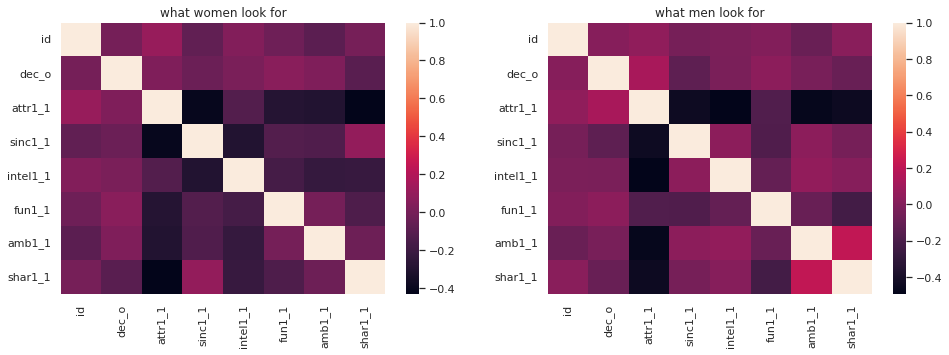

In [42]:
fig, (ax1,ax2) =plt.subplots(1,2,  figsize=(16,5))

sns.heatmap(corrW, 
            xticklabels=corrW.columns.values,
            yticklabels=corrW.columns.values,ax=ax1)
ax1.set_title('what women look for')

sns.heatmap(corrM, 
            xticklabels=corrM.columns.values,
            yticklabels=corrM.columns.values,ax=ax2)
ax2.set_title("what men look for")



<h4>Continue visualization

In [43]:
corrMG=corrM["dec_o"].head(15)[2:].to_frame()
corrWG=corrW["dec_o"].head(15)[2:].to_frame()
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=corrWG["dec_o"],
      theta = corrWG.index,
      fill='toself',
      name='What womens look for in a men'
))

fig.add_trace(go.Scatterpolar(
      r=corrMG["dec_o"],
      theta = corrMG.index,
      fill='toself',
      name='What men look for in a women'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False
    )),
  showlegend=True
)

<i>As we see above the <b>womens</b> look for these quality before seeing yes to second rdv: <br><b>- Funny partner.<br>- Ambitious partner.</b><br>
    Instead <b>men</b> pay attention to <b>Attractivity.</b> of their future partner before seeing yes to a second rdv.